<a href="https://colab.research.google.com/github/kjhoon7686/prac_class/blob/main/laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laptop Price Prediction

## Data Description
### 1. Company- String -Laptop Manufacturer
### 2. Product -String -Brand and Model
### 3. TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)
### 4. Inches -Numeric- Screen Size
### 5. ScreenResolution -String- Screen Resolution
### 6. Cpu- String -Central Processing Unit (CPU)
### 7. Ram -String- Laptop RAM
### 8. Memory -String- Hard Disk / SSD Memory
### 9. GPU -String- Graphics Processing Units (GPU)
### 10. OpSys -String- Operating System
### 11. Weight -String- Laptop Weight
### 12. Price_euros -Numeric- Price (Euro)(Target Value)

## Import Library

In [6]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/prac_class')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm, skew
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor   

## Data Read

In [9]:
# 데이터 불러오기
train=pd.read_csv('laptop_train.csv')
test=pd.read_csv('laptop_test.csv')

In [10]:
# 결과 분석을 위한 정답 데이터
test_origin=pd.read_csv('origin_test.csv')

In [11]:
# 데이터 정보/ 중복값 확인
train.info()
train.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1042 non-null   object 
 1   Product           1042 non-null   object 
 2   TypeName          1042 non-null   object 
 3   Inches            1025 non-null   float64
 4   ScreenResolution  1042 non-null   object 
 5   Cpu               1042 non-null   object 
 6   Ram               1042 non-null   object 
 7   Memory            1042 non-null   object 
 8   Gpu               1042 non-null   object 
 9   OpSys             1042 non-null   object 
 10  Weight            1042 non-null   object 
 11  price             1042 non-null   float64
dtypes: float64(2), object(10)
memory usage: 97.8+ KB


18

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           261 non-null    object 
 1   Product           261 non-null    object 
 2   TypeName          261 non-null    object 
 3   Inches            261 non-null    float64
 4   ScreenResolution  261 non-null    object 
 5   Cpu               261 non-null    object 
 6   Ram               261 non-null    object 
 7   Memory            261 non-null    object 
 8   Gpu               261 non-null    object 
 9   OpSys             261 non-null    object 
 10  Weight            261 non-null    object 
dtypes: float64(1), object(10)
memory usage: 22.6+ KB


In [13]:
train.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg,393.9
1,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,NaN,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2kg,344.0
2,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
3,Dell,Inspiron 7559,Gaming,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72kg,1099.0
4,Razer,Blade Stealth,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,1799.0


In [14]:
test.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Toshiba,Portege X30-D-10J,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.05kg
1,HP,Spectre 13-V100nv,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.11kg
2,Lenovo,IdeaPad 310-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A10-Series 9600P 2.4GHz,6GB,1TB HDD,AMD Radeon R5 430,Windows 10,2.4kg
3,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg
4,HP,EliteBook 820,Ultrabook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.26kg


In [15]:
# 중복값 제거(train)
train.drop_duplicates(ignore_index = True, inplace=True)

In [16]:
# 데이터 병합
train_len = len(train)
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285 entries, 0 to 1284
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1285 non-null   object 
 1   Product           1285 non-null   object 
 2   TypeName          1285 non-null   object 
 3   Inches            1268 non-null   float64
 4   ScreenResolution  1285 non-null   object 
 5   Cpu               1285 non-null   object 
 6   Ram               1285 non-null   object 
 7   Memory            1285 non-null   object 
 8   Gpu               1285 non-null   object 
 9   OpSys             1285 non-null   object 
 10  Weight            1285 non-null   object 
 11  price             1024 non-null   float64
dtypes: float64(2), object(10)
memory usage: 120.6+ KB


## DATA CLEANING 

In [18]:
dataset.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg,393.9
1,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,NaN,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2kg,344.0
2,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
3,Dell,Inspiron 7559,Gaming,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72kg,1099.0
4,Razer,Blade Stealth,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,1799.0


In [19]:
# "Ram"
dataset["Ram"] = dataset["Ram"].str.replace('GB', '')

In [20]:
# "Weight"
dataset["Weight"] = dataset["Weight"].str.replace('kg', '')

In [21]:
# 'Memory'
dataset['Memory'] = dataset['Memory'].astype(str).replace('\.0', '', regex=True)
dataset["Memory"] = dataset["Memory"].str.replace('GB', '')
dataset["Memory"] = dataset["Memory"].str.replace('TB', '000')

In [22]:
memory=dataset["Memory"].str.split("+", n = 1, expand = True) # '+' 기준으로 나누어서 컬럼 생성

In [23]:
memory

,0,1
0,500 HDD,None
1,1000 HDD,None
2,1000 HDD,None
3,128 SSD,1000 HDD
4,512 SSD,None
...,...,...
1280,256 SSD,None
1281,256 SSD,None
1282,256 SSD,None
1283,512 SSD,None


In [24]:
dataset["first"]= memory[0]
dataset["first"]=dataset["first"].str.strip() # 공백제거

In [25]:
dataset['second']=memory[1]

In [26]:
# 'first'
dataset["1HDD"] = dataset["first"].apply(lambda x: 1 if "HDD" in x else 0)
dataset["1SSD"] = dataset["first"].apply(lambda x: 1 if "SSD" in x else 0)
dataset["1Hybrid"] = dataset["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
dataset["1Flash_Storage"] = dataset["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [27]:
dataset['first'] = dataset['first'].str.replace(r'\D', '') # 문자 지우기

In [28]:
dataset["second"].fillna("0", inplace = True) # null값 0으로 변환

In [29]:
dataset["2HDD"] = dataset["second"].apply(lambda x: 1 if "HDD" in x else 0)
dataset["2SSD"] = dataset["second"].apply(lambda x: 1 if "SSD" in x else 0)
dataset["2Hybrid"] = dataset["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
dataset["2Flash_Storage"] = dataset["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [30]:
dataset['second'] = dataset['second'].str.replace(r'\D', '')

In [31]:
# 정수형으로 변환
dataset["first"] = dataset["first"].astype(int)
dataset["second"] = dataset["second"].astype(int)

In [32]:
# 메모리 용량 합 피처로 memory 대체
dataset["Total_Memory"]=(dataset["first"]*(dataset["1HDD"]+dataset["1SSD"]+dataset["1Hybrid"]+dataset["1Flash_Storage"])+dataset["second"]*(dataset["2HDD"]+dataset["2SSD"]+dataset["2Hybrid"]+dataset["2Flash_Storage"]))
dataset["Memory"]=dataset["Total_Memory"]

In [33]:
# 변수통합
dataset["HDD"]=(dataset["first"]*dataset["1HDD"]+dataset["second"]*dataset["2HDD"])
dataset["SSD"]=(dataset["first"]*dataset["1SSD"]+dataset["second"]*dataset["2SSD"])
dataset["Hybrid"]=(dataset["first"]*dataset["1Hybrid"]+dataset["second"]*dataset["2Hybrid"])
dataset["Flash_Storage"]=(dataset["first"]*dataset["1Flash_Storage"]+dataset["second"]*dataset["2Flash_Storage"])

In [34]:
# "ScreenResolution"
sr = dataset["ScreenResolution"].str.split("x", n = 1, expand = True) # x기준으로 분할

In [35]:
dataset["X"]= sr[0] 

In [36]:
dataset['Y']= sr[1]

In [37]:
# dataset['Y'] float형으로
dataset["Y"]=pd.to_numeric(dataset["Y"])
dataset["Y"] = dataset["Y"].astype(float)

In [38]:
# dataset['X'] 문자 제거 후 float형으로
dataset["X"]=(dataset['X'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: pd.Series(x).astype(int)).mean(1))
dataset["X"]=pd.to_numeric(dataset["X"])

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285 entries, 0 to 1284
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1285 non-null   object 
 1   Product           1285 non-null   object 
 2   TypeName          1285 non-null   object 
 3   Inches            1268 non-null   float64
 4   ScreenResolution  1285 non-null   object 
 5   Cpu               1285 non-null   object 
 6   Ram               1285 non-null   object 
 7   Memory            1285 non-null   int64  
 8   Gpu               1285 non-null   object 
 9   OpSys             1285 non-null   object 
 10  Weight            1285 non-null   object 
 11  price             1024 non-null   float64
 12  first             1285 non-null   int64  
 13  second            1285 non-null   int64  
 14  1HDD              1285 non-null   int64  
 15  1SSD              1285 non-null   int64  
 16  1Hybrid           1285 non-null   int64  


In [40]:
# 숫자만으로 변경
dataset["ScreenResolution"]=(dataset["X"]*dataset["Y"]).astype(float)

In [41]:
# 데이터 타입 변경('Ram', 'Weight')
dataset["Ram"] = dataset["Ram"].astype(int)
dataset["Weight"] = dataset["Weight"].astype(float)

In [42]:
# 필요없는 피처 삭제
dataset=dataset.drop(['first','second','1HDD','1SSD','1Hybrid','1Flash_Storage','2HDD','2SSD','2Hybrid','2Flash_Storage','Total_Memory'],axis=1)

In [43]:
dataset.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,HDD,SSD,Hybrid,Flash_Storage,X,Y
0,HP,250 G6,Notebook,15.6,1049088.0,Intel Core i5 7200U 2.5GHz,4,500,Intel HD Graphics 620,No OS,1.86,393.9,500,0,0,0,1366.0,768.0
1,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,NaN,2073600.0,Intel Celeron Dual Core N3350 1.1GHz,4,1000,Intel HD Graphics 500,Windows 10,2.00,344.0,1000,0,0,0,1920.0,1080.0
2,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1049088.0,Intel Core i7 6500U 2.5GHz,6,1000,AMD Radeon R5 M330,Windows 10,2.19,764.0,1000,0,0,0,1366.0,768.0
3,Dell,Inspiron 7559,Gaming,15.6,8294400.0,Intel Core i7 6700HQ 2.6GHz,16,1128,Nvidia GeForce GTX 960M,Windows 10,2.72,1099.0,1000,128,0,0,3840.0,2160.0
4,Razer,Blade Stealth,Ultrabook,12.5,8294400.0,Intel Core i7 7500U 2.5GHz,16,512,Intel HD Graphics 620,Windows 10,1.29,1799.0,0,512,0,0,3840.0,2160.0


## Missing Value ('Inches')

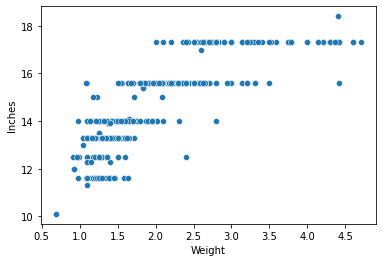

In [44]:
# 'weight'와 'inches' 간의 상관 관계 학인
sns.scatterplot(data=dataset[:train_len], x="Weight", y="Inches")

In [45]:
# weight에 따른 'inches'의 중위값으로 결측치 대체
index_NaN_inches = list(dataset["Inches"][dataset["Inches"].isnull()].index)

for i in index_NaN_inches :
    Inches_med = dataset["Inches"].median()
    Inches_pred = dataset["Inches"][dataset['Weight'] == dataset.iloc[i]["Weight"]].median()
    if not np.isnan(Inches_pred) :
        dataset['Inches'].iloc[i] = Inches_pred
    else :
        dataset['Inches'].iloc[i] = Inches_med

In [46]:
# missing value check
dataset.isnull().sum()

Company               0
Product               0
TypeName              0
Inches                0
ScreenResolution      0
Cpu                   0
Ram                   0
Memory                0
Gpu                   0
OpSys                 0
Weight                0
price               261
HDD                   0
SSD                   0
Hybrid                0
Flash_Storage         0
X                     0
Y                     0
dtype: int64

In [47]:
# ppi 피처 생성
dataset["PPI"]=(((dataset["X"]**2+dataset["Y"]**2)**(1/2))/dataset["Inches"]).astype(float)

In [48]:
# X, Y drop
dataset.drop(['X', 'Y'], axis=1, inplace=True)

## EDA, Outlier

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285 entries, 0 to 1284
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1285 non-null   object 
 1   Product           1285 non-null   object 
 2   TypeName          1285 non-null   object 
 3   Inches            1285 non-null   float64
 4   ScreenResolution  1285 non-null   float64
 5   Cpu               1285 non-null   object 
 6   Ram               1285 non-null   int64  
 7   Memory            1285 non-null   int64  
 8   Gpu               1285 non-null   object 
 9   OpSys             1285 non-null   object 
 10  Weight            1285 non-null   float64
 11  price             1024 non-null   float64
 12  HDD               1285 non-null   int64  
 13  SSD               1285 non-null   int64  
 14  Hybrid            1285 non-null   int64  
 15  Flash_Storage     1285 non-null   int64  
 16  PPI               1285 non-null   float64


In [50]:
dataset.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,HDD,SSD,Hybrid,Flash_Storage,PPI
0,HP,250 G6,Notebook,15.6,1049088.0,Intel Core i5 7200U 2.5GHz,4,500,Intel HD Graphics 620,No OS,1.86,393.9,500,0,0,0,100.454670
1,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,15.6,2073600.0,Intel Celeron Dual Core N3350 1.1GHz,4,1000,Intel HD Graphics 500,Windows 10,2.00,344.0,1000,0,0,0,141.211998
2,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1049088.0,Intel Core i7 6500U 2.5GHz,6,1000,AMD Radeon R5 M330,Windows 10,2.19,764.0,1000,0,0,0,100.454670
3,Dell,Inspiron 7559,Gaming,15.6,8294400.0,Intel Core i7 6700HQ 2.6GHz,16,1128,Nvidia GeForce GTX 960M,Windows 10,2.72,1099.0,1000,128,0,0,282.423996
4,Razer,Blade Stealth,Ultrabook,12.5,8294400.0,Intel Core i7 7500U 2.5GHz,16,512,Intel HD Graphics 620,Windows 10,1.29,1799.0,0,512,0,0,352.465147


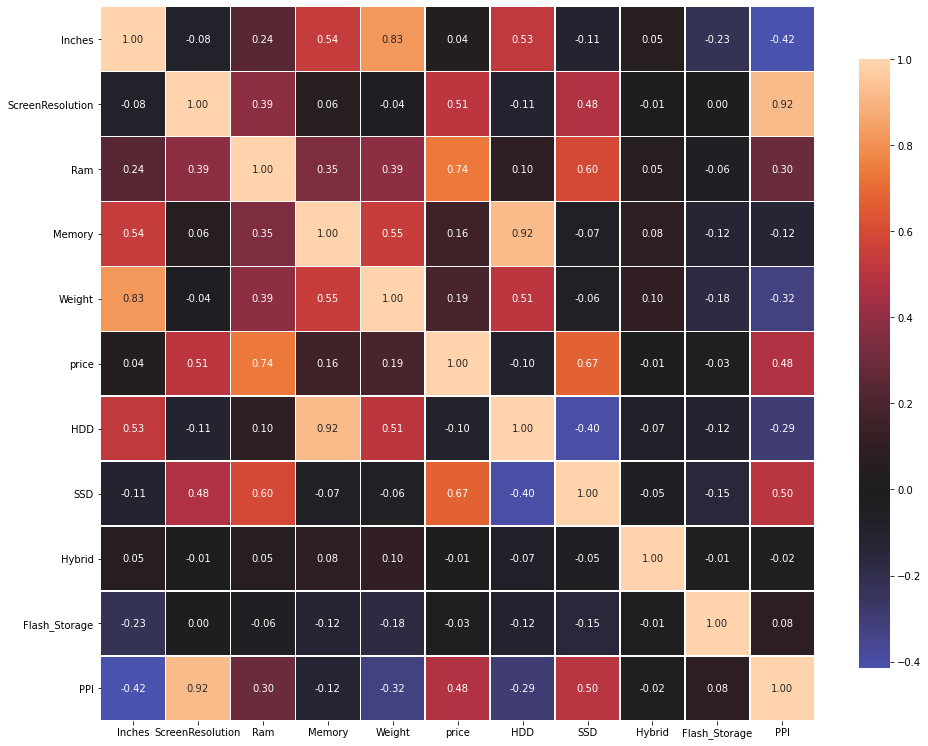

In [51]:
# correlation check (hdd/memory, ppi/screenresolution, inches/weight 상관계수 매우 높음)(price에는 ram, ssd, ppi가 영향을 많이 줄 것으로 예상))
def correlation_heatmap(train):
    correlations = train.corr()    
    fig, ax = plt.subplots(figsize=(16,16))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.70})
    plt.show()
correlation_heatmap(dataset)

### - categorical columns('Company','Product, 'TypeName', 'cpu', 'gpu','opsys'  )

Lenovo       238
Dell         228
HP           209
Asus         126
Acer          81
MSI           44
Toshiba       41
Apple         19
Samsung        7
Razer          6
Vero           4
Mediacom       4
Microsoft      4
LG             3
Google         3
Chuwi          3
Xiaomi         2
Fujitsu        1
Huawei         1
Name: Company, dtype: int64


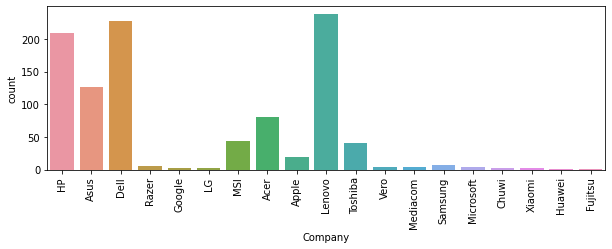

XPS 13                                   26
250 G6                                   19
Inspiron 3567                            18
ProBook 450                              16
Inspiron 5570                            16
                                         ..
15-bs012nv (i7-7500U/8GB/1TB/Radeon       1
Pavilion 15-BC000nv                       1
V320-17ISK (i3-6006U/4GB/500GB/FHD/No     1
Rog GL552VW-DM201T                        1
Rog GL752VW-T4308T                        1
Name: Product, Length: 535, dtype: int64


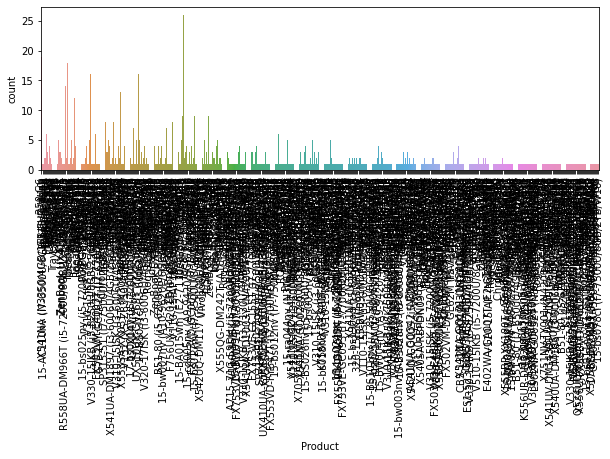

Notebook              563
Gaming                166
Ultrabook             162
2 in 1 Convertible     87
Workstation            24
Netbook                22
Name: TypeName, dtype: int64


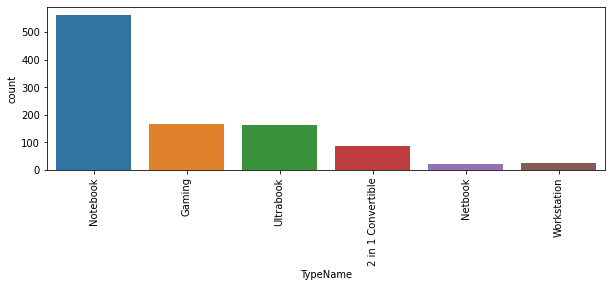

Intel Core i5 7200U 2.5GHz     144
Intel Core i7 7700HQ 2.8GHz    120
Intel Core i7 7500U 2.7GHz     112
Intel Core i7 8550U 1.8GHz      65
Intel Core i3 6006U 2GHz        57
                              ... 
Intel Core M M7-6Y75 1.2GHz      1
Intel Core i7 2.8GHz             1
AMD FX 9830P 3GHz                1
Intel Core i7 7700HQ 2.7GHz      1
Intel Core i5 7200U 2.70GHz      1
Name: Cpu, Length: 103, dtype: int64


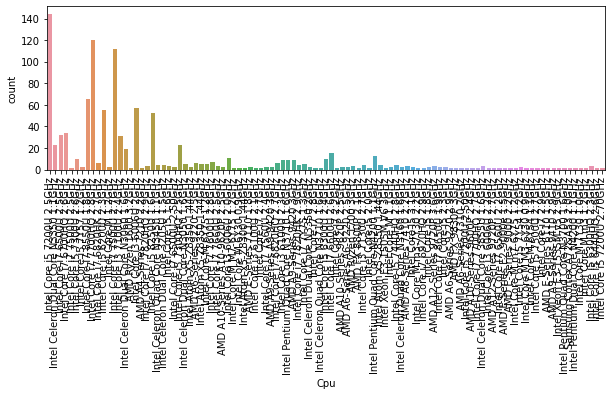

Intel HD Graphics 620       222
Intel HD Graphics 520       147
Intel UHD Graphics 620       56
Nvidia GeForce GTX 1050      52
Nvidia GeForce GTX 1060      39
                           ... 
Nvidia Quadro M3000M          1
Intel HD Graphics 630         1
ARM Mali T860 MP4             1
Nvidia GeForce GTX 930MX      1
Intel Iris Pro Graphics       1
Name: Gpu, Length: 102, dtype: int64


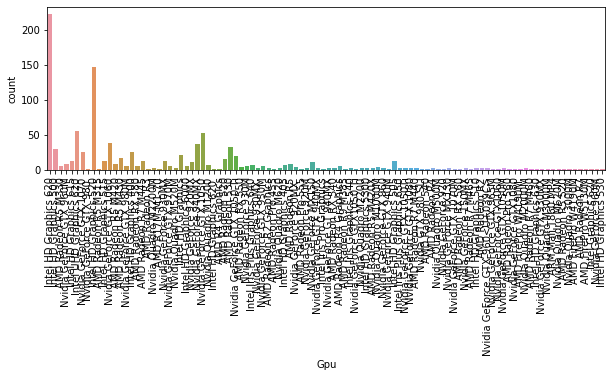

Windows 10      833
No OS            51
Linux            50
Windows 7        40
Chrome OS        23
macOS            11
Mac OS X          8
Windows 10 S      6
Android           2
Name: OpSys, dtype: int64


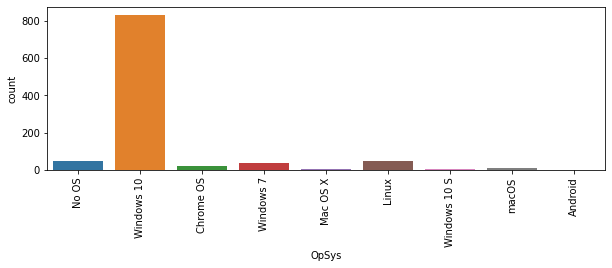

In [52]:
# categorical feature countplot(빈도표)
categorical_ftr=['Company','Product', 'TypeName', 'Cpu', 'Gpu', 'OpSys']

for i in categorical_ftr:    
    print(train[i].value_counts())
    plt.figure(figsize=(10,3))
    sns.countplot(x=i , data=train)
    plt.xticks(size=10, rotation='vertical')
    plt.show()

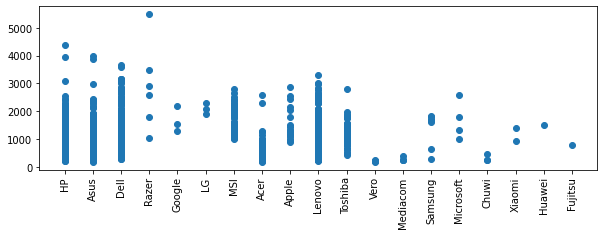

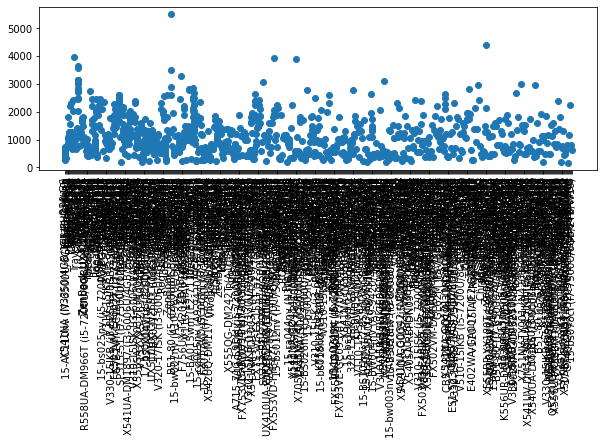

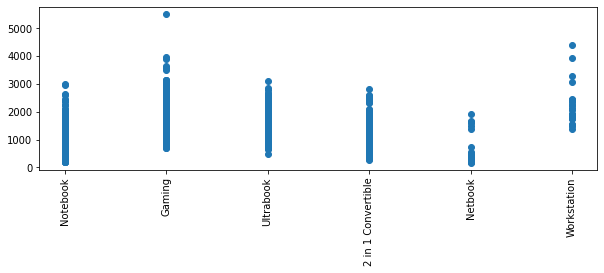

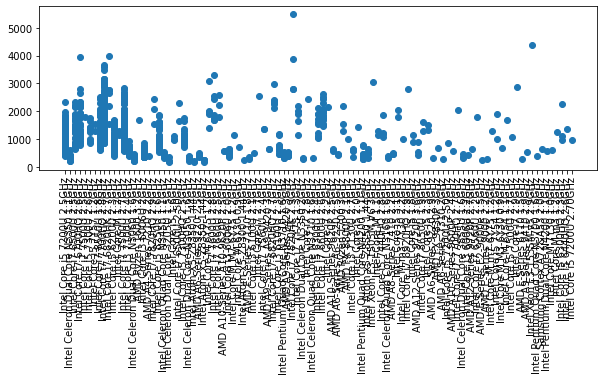

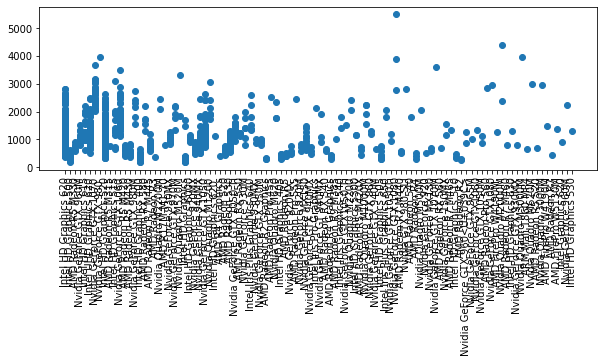

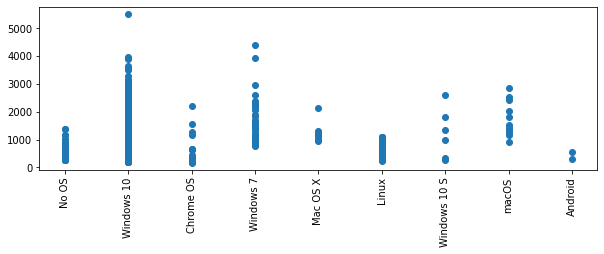

In [53]:
# scatter plot(price, categorical feature)
for i in categorical_ftr:    
    plt.figure(figsize=(10,3))
    plt.scatter(x=i,y="price", data=train)
    plt.xticks(size=10, rotation='vertical')
    plt.show()

### - numeric columns

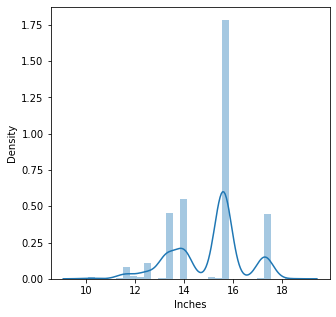

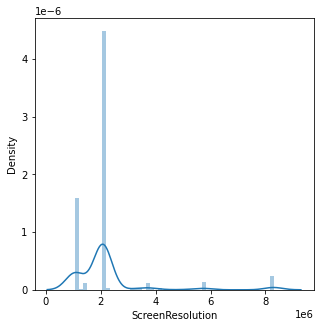

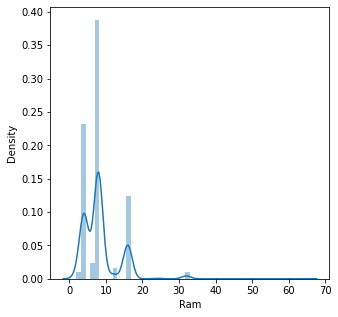

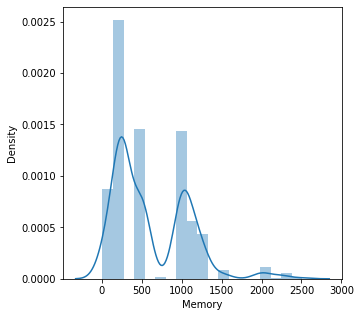

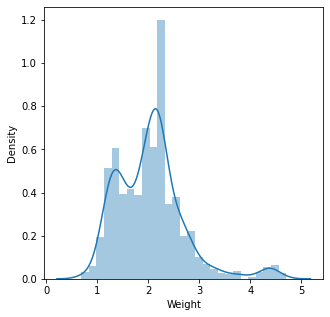

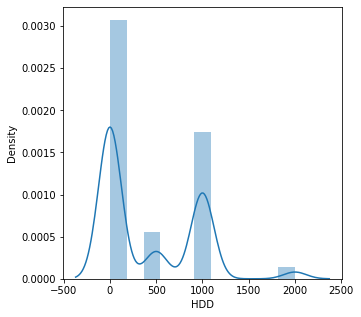

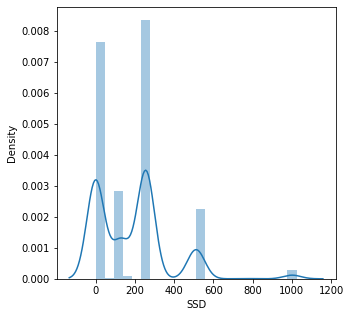

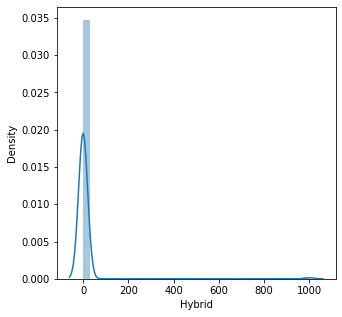

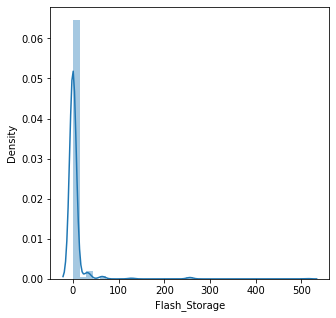

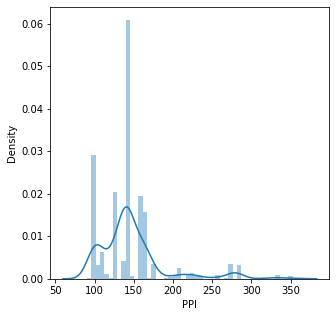

In [54]:
# numeric feature histogram
numeric_ftr=dataset.select_dtypes(exclude=['object']).drop(['price'], axis=1).columns

for i in numeric_ftr:    
    fig = plt.figure(figsize=(5,5))
    sns.distplot(dataset[i])
    plt.show()

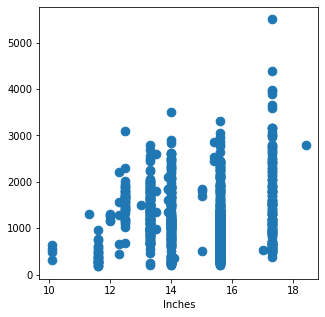

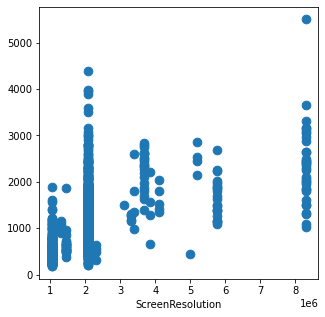

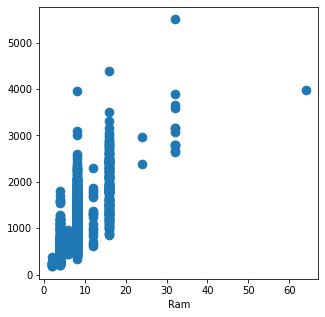

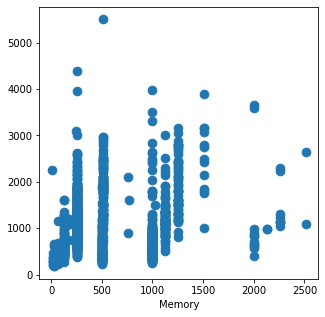

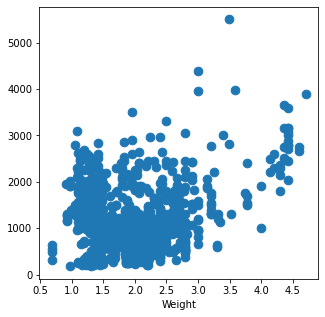

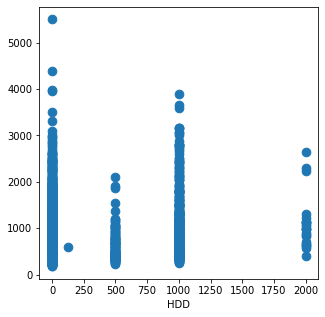

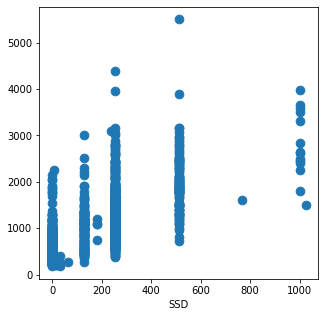

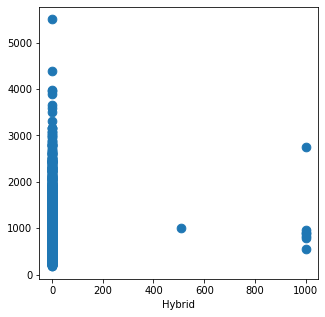

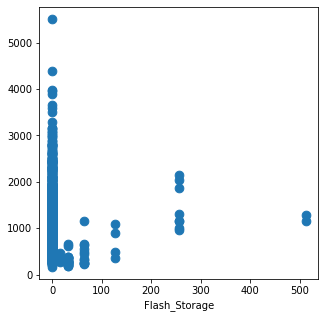

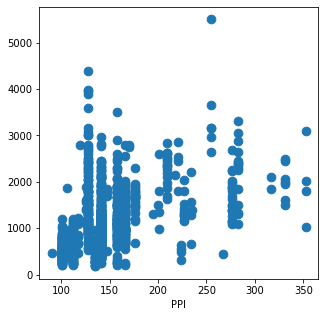

In [55]:
# scatter plot(price, numeric feature)
for i in numeric_ftr:  
    fig = plt.figure(figsize=(5,5)) 
    plt.scatter(data=dataset[:train_len], x=i, y="price", s=75)
    plt.xlabel(i)
    plt.xticks(size=10)
    plt.show()

In [56]:
# outlier delete
dataset.drop([669] , axis=0, inplace=True)
train.drop([669] , axis=0, inplace=True)

In [57]:
train_len = len(train)

## scaling and data separate

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 1284
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1284 non-null   object 
 1   Product           1284 non-null   object 
 2   TypeName          1284 non-null   object 
 3   Inches            1284 non-null   float64
 4   ScreenResolution  1284 non-null   float64
 5   Cpu               1284 non-null   object 
 6   Ram               1284 non-null   int64  
 7   Memory            1284 non-null   int64  
 8   Gpu               1284 non-null   object 
 9   OpSys             1284 non-null   object 
 10  Weight            1284 non-null   float64
 11  price             1023 non-null   float64
 12  HDD               1284 non-null   int64  
 13  SSD               1284 non-null   int64  
 14  Hybrid            1284 non-null   int64  
 15  Flash_Storage     1284 non-null   int64  
 16  PPI               1284 non-null   float64


In [59]:
dataset.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,HDD,SSD,Hybrid,Flash_Storage,PPI
0,HP,250 G6,Notebook,15.6,1049088.0,Intel Core i5 7200U 2.5GHz,4,500,Intel HD Graphics 620,No OS,1.86,393.9,500,0,0,0,100.454670
1,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,15.6,2073600.0,Intel Celeron Dual Core N3350 1.1GHz,4,1000,Intel HD Graphics 500,Windows 10,2.00,344.0,1000,0,0,0,141.211998
2,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1049088.0,Intel Core i7 6500U 2.5GHz,6,1000,AMD Radeon R5 M330,Windows 10,2.19,764.0,1000,0,0,0,100.454670
3,Dell,Inspiron 7559,Gaming,15.6,8294400.0,Intel Core i7 6700HQ 2.6GHz,16,1128,Nvidia GeForce GTX 960M,Windows 10,2.72,1099.0,1000,128,0,0,282.423996
4,Razer,Blade Stealth,Ultrabook,12.5,8294400.0,Intel Core i7 7500U 2.5GHz,16,512,Intel HD Graphics 620,Windows 10,1.29,1799.0,0,512,0,0,352.465147


In [60]:
y=train['price']
dataset_pre=dataset.drop(['price'], axis=1)

### 1. skew 

In [61]:
# numeric_feats = dataset_pre.dtypes[dataset_pre.dtypes != "object"].index

# # Check the skew of all numerical features
# skewed_feats = dataset_pre[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# print("\nSkew in numerical features: \n")
# skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.head(10)

In [62]:
# skewness = skewness[abs(skewness) > 0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     #all_data[feat] += 1
#     dataset_pre[feat] = boxcox1p(dataset_pre[feat], lam)

In [63]:
# dataset_after = pd.get_dummies(dataset_pre)
# print(dataset_after.shape)

In [64]:
# dataset_after

### 2. log transformation

In [65]:
from scipy.stats import skew

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = dataset_pre.dtypes[dataset_pre.dtypes != 'object'].index

skew_features = dataset_pre[features_index].apply(lambda x : skew(x))
# skew 정도가 3 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 3]
print(skew_features_top.sort_values(ascending=False))

Hybrid              11.485639
Flash_Storage       11.117009
ScreenResolution     3.154095
dtype: float64


In [66]:
dataset_pre[skew_features_top.index] = np.log1p(dataset_pre[skew_features_top.index])

In [67]:
dataset_after = pd.get_dummies(dataset_pre)
print(dataset_after.shape)

(1284, 890)


In [68]:
dataset_after

,Inches,ScreenResolution,Ram,Memory,Weight,HDD,SSD,Hybrid,Flash_Storage,PPI,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product_110-15ACL (A6-7310/4GB/500GB/W10),Product_14-am079na (N3710/8GB/2TB/W10),Product_15-AC110nv (i7-6500U/6GB/1TB/Radeon,Product_15-AY023na (N3710/8GB/2TB/W10),Product_15-BA015wm (E2-7110/4GB/500GB/W10),Product_15-BS026nv (i5-7200U/8GB/256GB/Radeon,Product_15-BS028nv (i3-6006U/4GB/1TB/Radeon,Product_15-BS078nr (i7-7500U/8GB/1TB/W10),Product_15-BS101nv (i7-8550U/8GB/256GB/FHD/W10),Product_15-BS103nv (i5-8250U/6GB/256GB/Radeon,Product_15-BW004nv (A9-9420/4GB/256GB/Radeon,...,Gpu_Nvidia GeForce GTX 1060,Gpu_Nvidia GeForce GTX 1070,Gpu_Nvidia GeForce GTX 1070M,Gpu_Nvidia GeForce GTX 1080,Gpu_Nvidia GeForce GTX 930MX,Gpu_Nvidia GeForce GTX 940M,Gpu_Nvidia GeForce GTX 940MX,Gpu_Nvidia GeForce GTX 950M,Gpu_Nvidia GeForce GTX 960,Gpu_Nvidia GeForce GTX 960<U+039C>,Gpu_Nvidia GeForce GTX 960M,Gpu_Nvidia GeForce GTX 965M,Gpu_Nvidia GeForce GTX 970M,Gpu_Nvidia GeForce GTX 980,Gpu_Nvidia GeForce GTX 980M,Gpu_Nvidia GeForce GTX1050 Ti,Gpu_Nvidia GeForce GTX1060,Gpu_Nvidia GeForce GTX1080,Gpu_Nvidia GeForce MX130,Gpu_Nvidia GeForce MX150,Gpu_Nvidia Quadro 3000M,Gpu_Nvidia Quadro M1000M,Gpu_Nvidia Quadro M1200,Gpu_Nvidia Quadro M2000M,Gpu_Nvidia Quadro M2200,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M3000M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M520M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,15.6,13.863433,4,500,1.86,500,0,0.0,0.0,100.454670,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,15.6,14.544797,4,1000,2.00,1000,0,0.0,0.0,141.211998,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,15.6,13.863433,6,1000,2.19,1000,0,0.0,0.0,100.454670,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,15.6,15.931091,16,1128,2.72,1000,128,0.0,0.0,282.423996,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,12.5,15.931091,16,512,1.29,0,512,0.0,0.0,352.465147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,13.3,14.544797,12,256,1.60,0,256,0.0,0.0,165.632118,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1281,17.3,14.544797,8,256,2.50,0,256,0.0,0.0,127.335675,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1282,17.3,14.544797,16,256,3.42,0,256,0.0,0.0,127.335675,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1283,14.0,15.120161,8,512,1.70,0,512,0.0,0.0,209.800683,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### 3. scaling(standard scaler, minmaxscaler)

In [69]:
# # 1. standardscaler
# dataset_pre=pd.get_dummies(dataset_pre)
# scaler=StandardScaler()
# dataset_scaled=scaler.fit_transform(dataset_pre)
# dataset_after=pd.DataFrame(dataset_scaled, columns=dataset_pre.columns)

In [70]:
# # 2. minmaxscaler
# dataset_pre=pd.get_dummies(dataset_pre)
# scaler=MinMaxScaler()
# dataset_scaled=scaler.fit_transform(dataset_pre)
# dataset_after=pd.DataFrame(dataset_scaled, columns=dataset_pre.columns)

### train, test data separation

In [71]:
# target value log transformation
X_train=dataset_after[:train_len]
X_test=dataset_after[train_len:]
y_train=np.log1p(y.values)

In [72]:
y_test=test_origin['price']

### modeling function definition

In [73]:
# hyperparameter tuning function
# linear regression model
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 parameters:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_, rmse

# cart model
def print_best_params_t(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train.values, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 parameters:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_, rmse

In [74]:
# visualization function
# linear regression model
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_train.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low


def visualize_coefficient(model):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, ax = plt.subplots(figsize=(5,5),nrows=1, ncols=1)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    
    # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
    coef_high, coef_low = get_top_bottom_coef(model)
    coef_concat = pd.concat( [coef_high , coef_low] )
    # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
    ax.set_title(model.__class__.__name__+' Coeffiecents', size=25)
    ax.tick_params(axis="y",direction="in", pad=-120)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(12)
    sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=ax)

# cart model
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(model):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, ax = plt.subplots(figsize=(5,5),nrows=1, ncols=1)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 

    # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
    ftr_top20 = get_top_features(model)
    ax.set_title(model.__class__.__name__+' Feature Importances', size=25)
    # font 크기 조정.
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(12)
    sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=ax)


In [75]:
# result dataframe
result=pd.DataFrame()

## modeling

### linear regression model

#### Ridge

In [76]:
# default hyperparameter
ridge_reg = Ridge()
rmse_list_rd = np.sqrt(-cross_val_score(ridge_reg, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_avg_rd = np.mean(rmse_list_rd)
print(rmse_avg_rd)

0.2139766197247562


In [77]:
# hyperparameter tuning
ridge_params = { 'alpha':[0.35, 0.1, 0.2 ] }
best_ridge = print_best_params(ridge_reg, ridge_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.2155, 최적 parameters:{'alpha': 0.35}


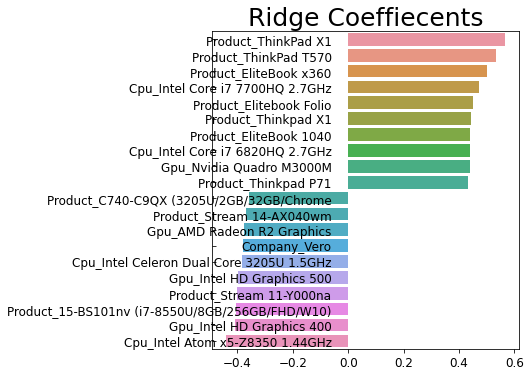

In [78]:
# train and visualize regression coefficient
ridge_reg = Ridge(alpha=0.35)
ridge_reg.fit(X_train, y_train)
visualize_coefficient(ridge_reg)
y_pred_rd=ridge_reg.predict(X_test)
result['Ridge']=[best_ridge[1]]

54677.94691310122
233.83316042234304


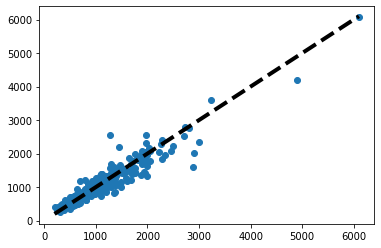

In [79]:
# compare prediction and actual target value
mse_rd = mean_squared_error(y_test , np.expm1(y_pred_rd))
rmse_rd = np.sqrt(mse_rd)
print(mse_rd)
print(rmse_rd)
plt.scatter(y_test, np.expm1(y_pred_rd))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

#### Lasso

In [80]:
# default hyperparameter
lasso_reg = Lasso()
rmse_list_ls = np.sqrt(-cross_val_score(lasso_reg, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_avg_ls = np.mean(rmse_list_ls)
print(rmse_avg_ls)

0.43766786444738387


In [81]:
# hyperparameter tuning
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_lasso = print_best_params(lasso_reg, lasso_params)

Lasso 5 CV 시 최적 평균 RMSE 값: 0.2494, 최적 parameters:{'alpha': 0.001}


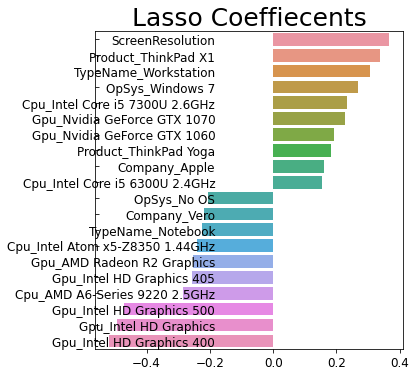

In [82]:
# train and visualize regression coefficient
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
visualize_coefficient(lasso_reg)
y_pred_ls=lasso_reg.predict(X_test)
result['lasso']=[best_lasso[1]]

92255.90633694045
303.73657392046226


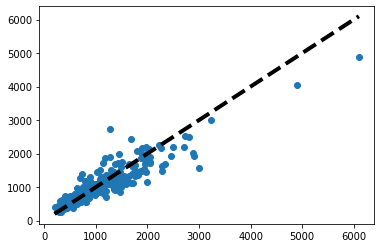

In [83]:
# compare prediction and actual target value
mse_ls = mean_squared_error(y_test , np.expm1(y_pred_ls))
rmse_ls = np.sqrt(mse_ls)
print(mse_ls)
print(rmse_ls)
plt.scatter(y_test, np.expm1(y_pred_ls))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

#### Elasticnet

In [84]:
# default hyperparameter
elastic_reg = ElasticNet(l1_ratio=0.1)
rmse_list_es = np.sqrt(-cross_val_score(elastic_reg, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_avg_es = np.mean(rmse_list_es)
print(rmse_avg_es)

0.40242923628330607


In [85]:
# hyperparameter tuning
elastic_params = {'alpha': [ 0.001, 0.01, 0.03, 0.07, 0.1, 0.5, 1] }
best_elastic = print_best_params(elastic_reg, elastic_params)

ElasticNet 5 CV 시 최적 평균 RMSE 값: 0.2154, 최적 parameters:{'alpha': 0.001}


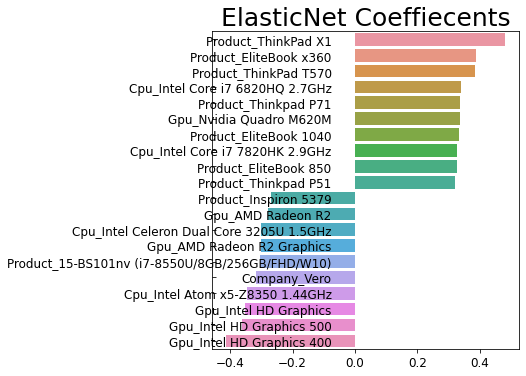

In [86]:
# train and visualize regression coefficient
elastic_reg = ElasticNet(alpha=0.001 ,l1_ratio=0.01)
elastic_reg.fit(X_train, y_train)
visualize_coefficient(elastic_reg)
y_pred_es=elastic_reg.predict(X_test)
result['elastic']=[best_elastic[1]]

56206.79984560608
237.07973309755113


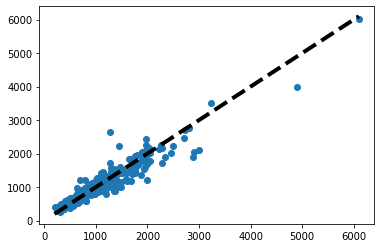

In [87]:
# compare prediction and actual target value
mse_es = mean_squared_error(y_test , np.expm1(y_pred_es))
rmse_es = np.sqrt(mse_es)
print(mse_es)
print(rmse_es)
plt.scatter(y_test, np.expm1(y_pred_es))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

### knn

In [88]:
# default hyperparameter
k_reg = KNeighborsRegressor()
rmse_list_k = np.sqrt(-cross_val_score(k_reg, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_avg_k = np.mean(rmse_list_k)
print(rmse_avg_k)

0.29030351265527665


In [89]:
# hyperparameter tuning
k_params = {'n_neighbors': np.arange(1, 12, 2),
              'weights': ['uniform', 'distance']}
best_k = print_best_params(k_reg, k_params)

KNeighborsRegressor 5 CV 시 최적 평균 RMSE 값: 0.2808, 최적 parameters:{'n_neighbors': 5, 'weights': 'distance'}


In [90]:
# training
k_reg = KNeighborsRegressor(n_neighbors= 5, weights= 'distance')
k_reg.fit(X_train, y_train)
y_pred_k=k_reg.predict(X_test)
result['knn']=[best_k[1]]

178965.07847945648
423.0426438072839


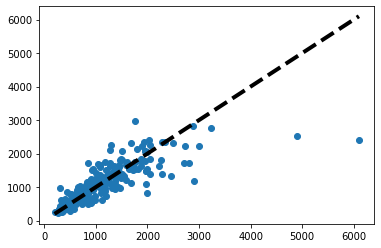

In [91]:
# compare prediction and actual target value
mse_k = mean_squared_error(y_test , np.expm1(y_pred_k))
rmse_k = np.sqrt(mse_k)
print(mse_k)
print(rmse_k)
plt.scatter(y_test, np.expm1(y_pred_k))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

### regression tree model

#### xgb

In [92]:
# default hyperparameter
xgb_reg = XGBRegressor(n_estimators=1000)
rmse_list_xgb = np.sqrt(-cross_val_score(xgb_reg, X_train.values, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_avg_xgb = np.mean(rmse_list_xgb)
print(rmse_avg_xgb)

[02:01:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:01:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:01:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:02:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:02:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.20585109201855906


In [93]:
# hyperparameter tuning
xgb_params = { 'n_estimators' : [3000],
                'learning_rate' : [0.07,0.001],
                'colsample_bytree': [0.1],
                'subsample' : [0.3],
                'max_depth' : [3],
                'reg_alpha' : [0.005]}
best_xgb = print_best_params_t(xgb_reg , xgb_params)

[02:02:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:02:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:02:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:03:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:03:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:03:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:03:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:03:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [94]:
# training
xgb_reg = XGBRegressor(n_estimators=3000, learning_rate=0.07, 
                       colsample_bytree=0.1, subsample=0.3, max_depth = 3, reg_alpha=0.005)
xgb_reg.fit(X_train.values, y_train)
y_pred_xgb=xgb_reg.predict(X_test.values)
result['xgbm']=[best_xgb[1]]

[02:04:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


51067.85903212956
225.9819882913892


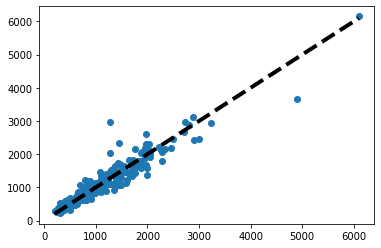

In [95]:
# compare prediction and actual target value
mse_xgb = mean_squared_error(y_test , np.expm1(y_pred_xgb))
rmse_xgb = np.sqrt(mse_xgb)
print(mse_xgb)
print(rmse_xgb)
plt.scatter(y_test, np.expm1(y_pred_xgb))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

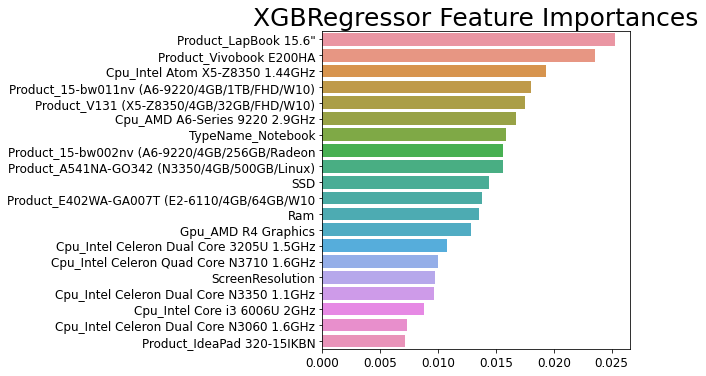

In [96]:
# visualize feature importance
visualize_ftr_importances(xgb_reg)

#### lgbm

In [97]:
# default hyperparameter
lgbm_reg = LGBMRegressor(n_estimators=1000)
rmse_list_lgbm = np.sqrt(-cross_val_score(lgbm_reg, X_train.values, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_avg_lgbm = np.mean(rmse_list_lgbm)
print(rmse_avg_lgbm)

0.2261458572970693


In [98]:
# hyperparameter tuning 
lgbm_params = {'n_estimators' : [1000, 500],
                'learning_rate' : [0.1, 0.05, 0.01]}
best_lgbm = print_best_params_t(lgbm_reg , lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.2212, 최적 parameters:{'learning_rate': 0.05, 'n_estimators': 500}


In [99]:
# training
lgbm_reg = LGBMRegressor(n_estimators=500, learning_rate=0.05)
lgbm_reg.fit(X_train.values, y_train)
y_pred_lgbm=lgbm_reg.predict(X_test.values)
result['lgbm']=[best_lgbm[1]]

114766.8816850639
338.77261058867185


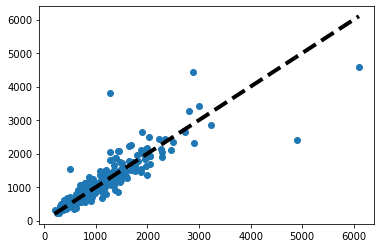

In [100]:
# compare prediction and actual target value
mse_lgbm = mean_squared_error(y_test , np.expm1(y_pred_lgbm))
rmse_lgbm = np.sqrt(mse_lgbm)
print(mse_lgbm)
print(rmse_lgbm)
plt.scatter(y_test, np.expm1(y_pred_lgbm))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

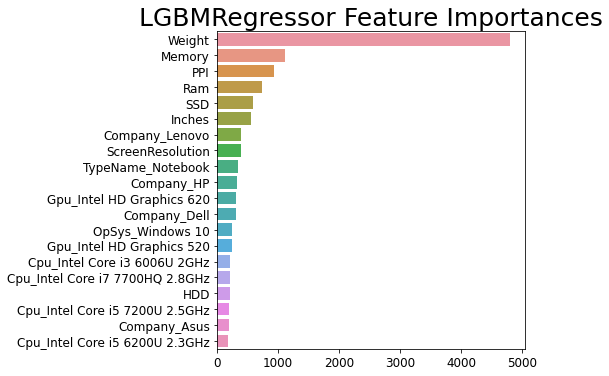

In [101]:
# visualize feature importance
visualize_ftr_importances(lgbm_reg)

#### randomforest

In [102]:
# default hyperparameter
rf_reg = RandomForestRegressor(n_estimators=1000)
rmse_list_rf = np.sqrt(-cross_val_score(rf_reg, X_train.values, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_avg_rf = np.mean(rmse_list_rf)
print(rmse_avg_rf)

0.21646910089078747


In [103]:
# hyperparameter tuning 
rf_params = {'n_estimators' : [1000],
                'max_depth' : [2,4,6] }
best_rf = print_best_params_t(rf_reg , rf_params)

RandomForestRegressor 5 CV 시 최적 평균 RMSE 값: 0.2573, 최적 parameters:{'max_depth': 6, 'n_estimators': 1000}


In [104]:
# training
rf_reg = RandomForestRegressor(n_estimators=1000, max_depth=6)
rf_reg.fit(X_train.values, y_train)
y_pred_rf=rf_reg.predict(X_test.values)
result['rf']=[best_rf[1]]

131493.0106705138
362.6196501439405


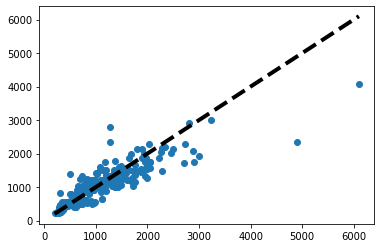

In [105]:
# compare prediction and actual target value
mse_rf = mean_squared_error(y_test , np.expm1(y_pred_rf))
rmse_rf = np.sqrt(mse_rf)
print(mse_rf)
print(rmse_rf)
plt.scatter(y_test, np.expm1(y_pred_rf))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

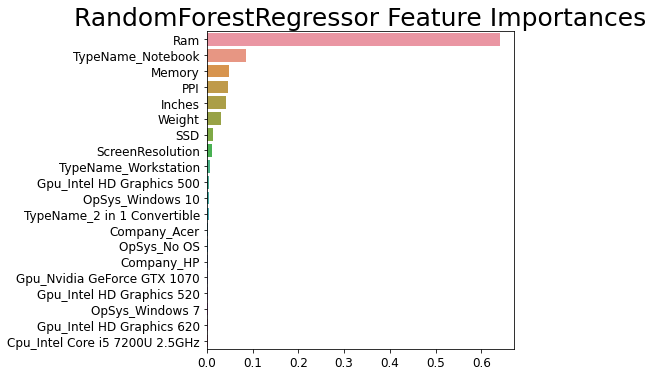

In [106]:
# visualize feature importance
visualize_ftr_importances(rf_reg)

#### gbm

In [107]:
# default hyperparameter
gb_reg = GradientBoostingRegressor( n_estimators=1000)
rmse_list_gb = np.sqrt(-cross_val_score(gb_reg, X_train.values, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_avg_gb = np.mean(rmse_list_gb)
print(rmse_avg_gb)

0.2000852499592697


In [108]:
# hyperparameter tuning 
gb_params = {'n_estimators' : [1500],
            'learning_rate' : [0.25,  0.01], 
            'max_depth': [4], 
            'max_features' : [9] }
best_gb = print_best_params_t(gb_reg , gb_params)

GradientBoostingRegressor 5 CV 시 최적 평균 RMSE 값: 0.2112, 최적 parameters:{'learning_rate': 0.25, 'max_depth': 4, 'max_features': 9, 'n_estimators': 1500}


In [109]:
# training
gb_reg = GradientBoostingRegressor(n_estimators= 1500, learning_rate=0.25, max_depth=4, max_features=9, random_state=0)#9
gb_reg.fit(X_train.values, y_train)
y_pred_gb=gb_reg.predict(X_test.values)
result['gbm']=[best_gb[1]]

59886.05129230452
244.71626691396


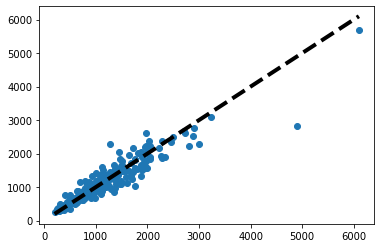

In [110]:
# compare prediction and actual target value
mse_gb = mean_squared_error(y_test , np.expm1(y_pred_gb))
rmse_gb = np.sqrt(mse_gb)
print(mse_gb)
print(rmse_gb)
plt.scatter(y_test, np.expm1(y_pred_gb))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

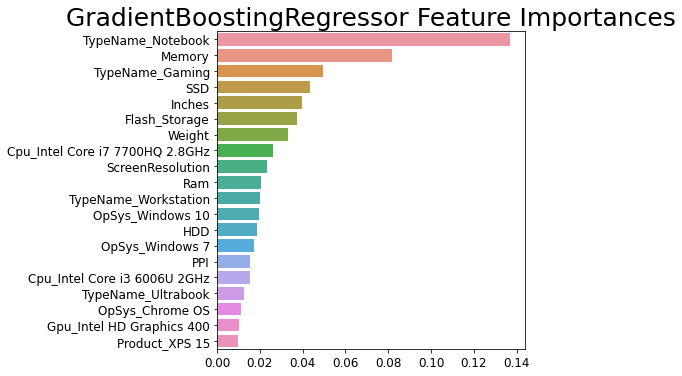

In [111]:
# visualize feature importance
visualize_ftr_importances(gb_reg)

#### Decision Tree

In [112]:
# default hyperparameter
dt_reg = DecisionTreeRegressor(random_state=0)
rmse_list_dt = np.sqrt(-cross_val_score(dt_reg, X_train.values, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_avg_dt = np.mean(rmse_list_dt)
print(rmse_avg_dt)

0.27868120939534236


In [113]:
# hyperparameter tuning 
dt_params = {'max_depth':[2,4,6,8] }
best_dt = print_best_params_t(dt_reg , dt_params)

DecisionTreeRegressor 5 CV 시 최적 평균 RMSE 값: 0.2833, 최적 parameters:{'max_depth': 8}


In [114]:
# training
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=8)
dt_reg.fit(X_train.values, y_train)
y_pred_dt=dt_reg.predict(X_test.values)
result['dt']=[best_dt[1]]

127682.6546484812
357.32709755696


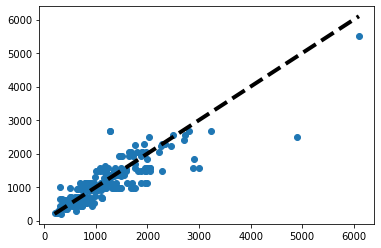

In [115]:
# compare prediction and actual target value
mse_dt = mean_squared_error(y_test , np.expm1(y_pred_dt))
rmse_dt = np.sqrt(mse_dt)
print(mse_dt)
print(rmse_dt)
plt.scatter(y_test, np.expm1(y_pred_dt))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

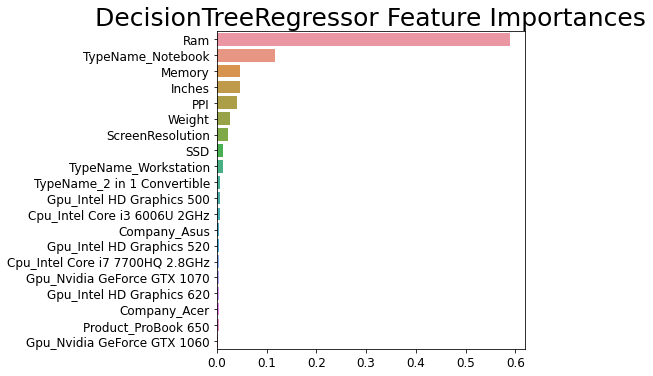

In [116]:
# visualize feature importance
visualize_ftr_importances(dt_reg)

#### stacking

In [117]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
# stacking function

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [118]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
elastic_train, elastic_test = get_stacking_base_datasets(elastic_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
gb_train, gb_test = get_stacking_base_datasets(gb_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
ElasticNet  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
[02:08:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  1  시작 
[02:09:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  2  시작 
[02:09:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  3  시작 
[02:09:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  4  시작 
[02:09:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
GradientBoostingRegressor  model 시작 
	 폴드 세트:  

In [119]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, elastic_train, 
                                      xgb_train, gb_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, elastic_test, 
                                     xgb_test, gb_test), axis=1)

# 최종 메타 모델은 XGBRegressor 모델을 적용. 
meta_model_XGBRegressor = XGBRegressor(n_estimators=3000, learning_rate=0.05, colsample_bytree=0.1, subsample=0.3)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_XGBRegressor.fit(Stack_final_X_train, y_train)
final = meta_model_XGBRegressor.predict(Stack_final_X_test)
rmse_list_final = np.sqrt(-cross_val_score(meta_model_XGBRegressor, Stack_final_X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_avg_final = np.mean(rmse_list_final)
print(rmse_avg_final)
result['stacking']=rmse_avg_final

[02:09:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:09:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:09:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:09:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:09:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:09:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.22912805617808493


## generating result final model file

In [120]:
# cross-validation result
result

,Ridge,lasso,elastic,knn,xgbm,lgbm,rf,gbm,dt,stacking
0,0.215518,0.249392,0.215439,0.280788,0.194166,0.221178,0.257345,0.211166,0.28327,0.229128


In [121]:
# final model(xgbm)
laptop_price=pd.DataFrame(np.expm1(y_pred_xgb), columns=['price'])

In [122]:
laptop_price

,price
0,1494.614258
1,1064.086548
2,603.980774
3,775.066528
4,1229.273315
...,...
256,1369.926758
257,1054.576660
258,3123.496826
259,1903.505371


## laptop price prediction result

### - 상관계수가 높은 feature들을 하나씩 제거하고 모델을 돌려봤는데 오히려 성능이 떨어졌다
### - 이상치 제거는 모델 성능에 큰 영향을 주었다
### - 1) boxcox transformation 2) log transformation 3) scaler 로 feature들을 변환해 보았는데, boxcox와 log transformation은 성능이 좋았지만 log transformation의 성능이 조금 더 좋았고 scaler를 통한 scaling은 오히려 성능이 떨어졌다.
### - scaler를 통한 scaling은 tree regression model에 아무런 변화를 가져오지 못했다.
### - 모델 성능 평가는 rmsle로 진행했고, 실제 결과와의 비교는 직관성을 위해 rmse로 평가했다.
### - 성능은 xgboost regressor가 가장 좋았다
### - 모델을 돌린 후 시각화를 해보니 cart model과 linear regression model에서 중요한 feature들이 다르다는 것을 알게 되었다 